## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data reading and basic metrics/preprocessing

In [3]:
df = pd.read_csv('df.csv')
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'])
df


,date,copper_price,buy_price,global_consumer_price_index,six_month_demand,gold_price,inventory
0,2020-01-01,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919
1,2020-02-01,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074
2,2020-03-01,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901
3,2020-04-01,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696
4,2020-05-01,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412
...,...,...,...,...,...,...,...
95,2027-12-01,3.510925,3.032640,196.290341,47.405890,2348.688526,22.279791
96,2028-01-01,3.397751,2.905826,197.409496,49.262588,2034.178653,6.486046
97,2028-02-01,3.251829,2.763559,199.246402,52.169598,1842.176256,46.331669
98,2028-03-01,3.259828,2.796132,199.289260,51.048567,2224.503966,39.992547


In [4]:
df.shape

(100, 7)

In [5]:
df_without_date = df.drop(columns=['date'])
df_without_date.describe()

,copper_price,buy_price,global_consumer_price_index,six_month_demand,gold_price,inventory
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.224293,2.722543,159.989632,34.914723,2087.926152,28.700803
std,0.275635,0.275799,23.512718,9.555565,178.331839,11.567952
min,2.654811,2.145191,117.999071,11.625787,1802.154844,3.505353
25%,3.066623,2.571619,139.976578,27.905697,1933.797925,21.728733
50%,3.251567,2.749005,159.399685,34.725549,2094.859819,29.972672
75%,3.368083,2.881985,179.810986,41.643890,2248.064183,36.084329
max,3.906448,3.408610,199.289260,55.510056,2386.981577,55.818895


In [6]:
df_without_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   copper_price                 100 non-null    float64
 1   buy_price                    100 non-null    float64
 2   global_consumer_price_index  100 non-null    float64
 3   six_month_demand             100 non-null    float64
 4   gold_price                   100 non-null    float64
 5   inventory                    100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB


In [7]:
df.isna().sum()

date                           0
copper_price                   0
buy_price                      0
global_consumer_price_index    0
six_month_demand               0
gold_price                     0
inventory                      0
dtype: int64

## Feature Selection Methods

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df_without_date.drop('six_month_demand', axis=1)
y = df_without_date['six_month_demand']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Correlation Coefficient

In [9]:
corr = df_without_date.corr()
corr['six_month_demand'].sort_values(ascending=False)

six_month_demand               1.000000
global_consumer_price_index    0.547820
inventory                      0.473308
gold_price                     0.102640
buy_price                     -0.079522
copper_price                  -0.083283
Name: six_month_demand, dtype: float64

### Recursive Feature Elimination

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Instantiate RFE with the model
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Check the ranking of features
ranking = rfe.ranking_
print(ranking)
print(X.columns)

[1 2 4 5 3]
Index(['copper_price', 'buy_price', 'global_consumer_price_index',
       'gold_price', 'inventory'],
      dtype='object')


### Lasso Regression (L1 Regularization)

In [27]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Instantiate the model with a regularization parameter alpha
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Check the coefficients
print(lasso.coef_)
print(X.columns)


[-0.         -0.          0.18451649  0.00262439  0.30131998]
Index(['copper_price', 'buy_price', 'global_consumer_price_index',
       'gold_price', 'inventory'],
      dtype='object')


### Random Forest Feature Importances

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
print(importances)
print(X.columns)


[0.09511529 0.0741466  0.39400304 0.15142891 0.28530616]
Index(['copper_price', 'buy_price', 'global_consumer_price_index',
       'gold_price', 'inventory'],
      dtype='object')


## Data visualization

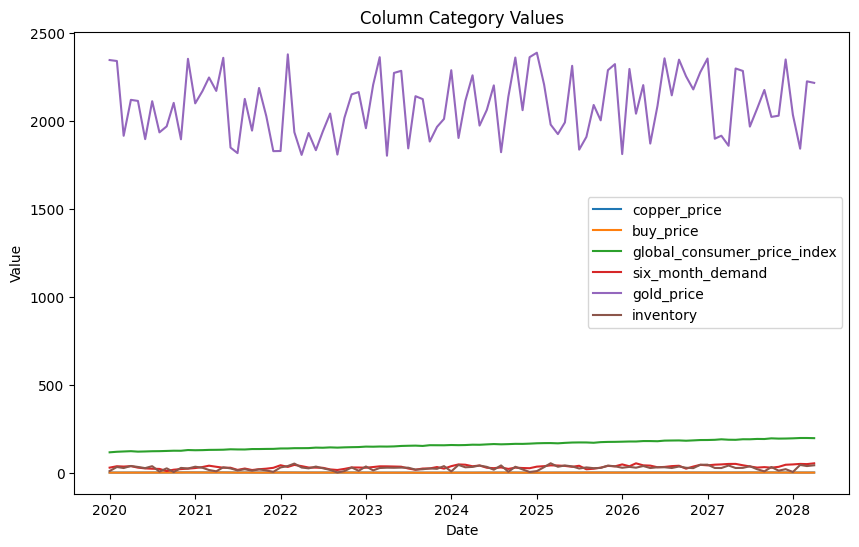

In [13]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot each column category value
for column in df.columns:
    if column != 'date':
        plt.plot(df['date'], df[column], label=column)

# Set the title and labels
plt.title('Column Category Values')
plt.xlabel('Date')
plt.ylabel('Value')

# Add a legend
plt.legend()

# Show the plot
plt.show()

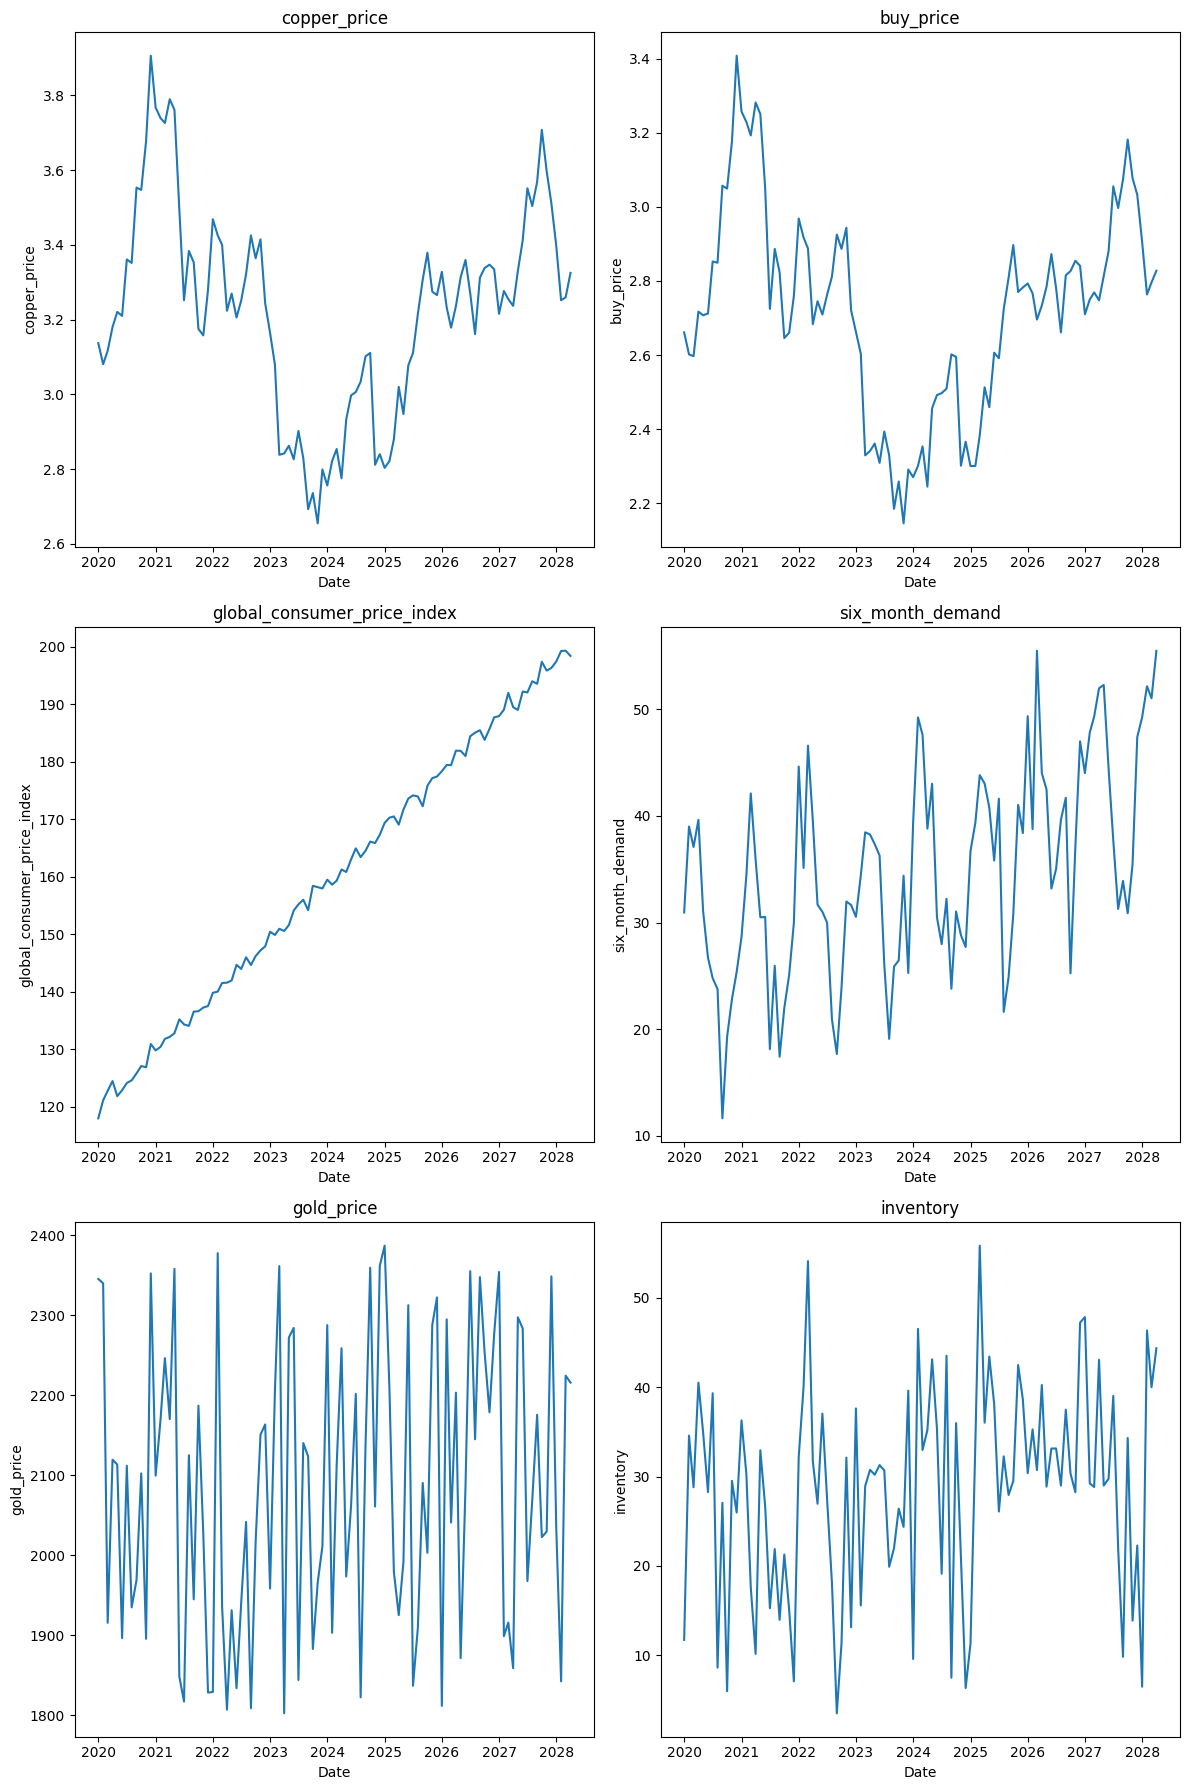

In [14]:
# Set the figure size
plt.figure(figsize=(12, 18))

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Iterate over the columns and create subplots
for i, column in enumerate(df.columns):
    if column != 'date':
        # Create a new subplot
        plt.subplot(num_rows, num_cols, i)
        
        # Plot the column values against the date
        plt.plot(df['date'], df[column])
        
        # Set the title and labels
        plt.title(column)
        plt.xlabel('Date')
        plt.ylabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
import plotly.express as px

fig = px.line(df, x='date', y=df.columns[1:], title="Values Over Time")
fig.show()

## Dimensionality reduction

### PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df_without_date)

# Get the target values
y = df_without_date['six_month_demand']

# Perform PCA analysis
pca_analysis = PCA(n_components=3)
pca_analysis.fit(scaled_data)
x = pca_analysis.transform(scaled_data)

Text(0, 0.5, 'pc2')

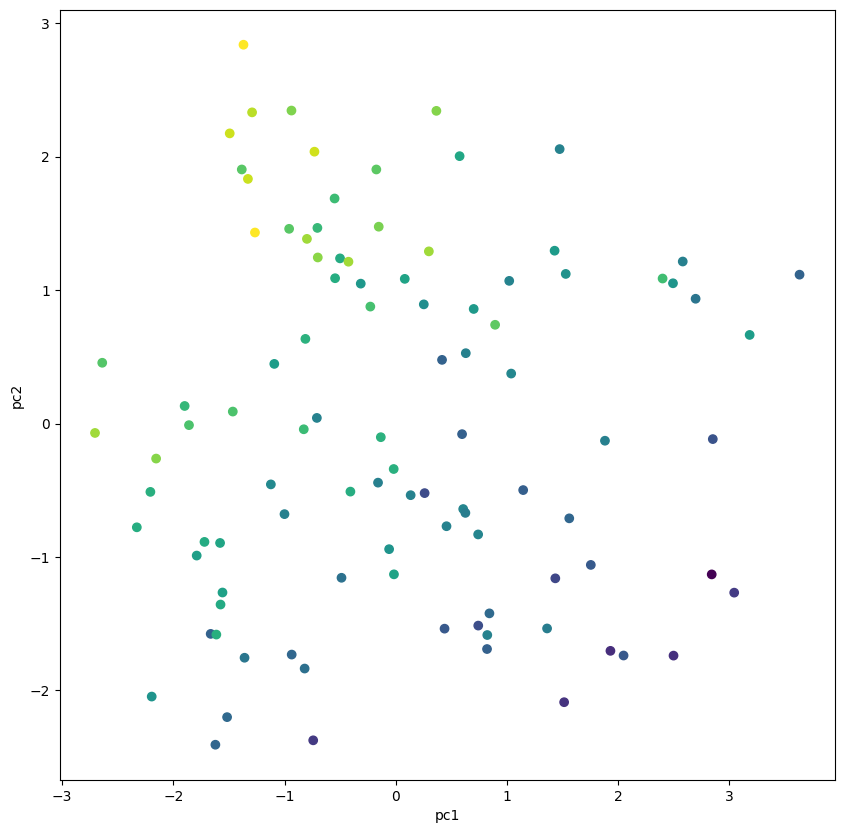

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')


Text(0.5, 0, 'PC3')

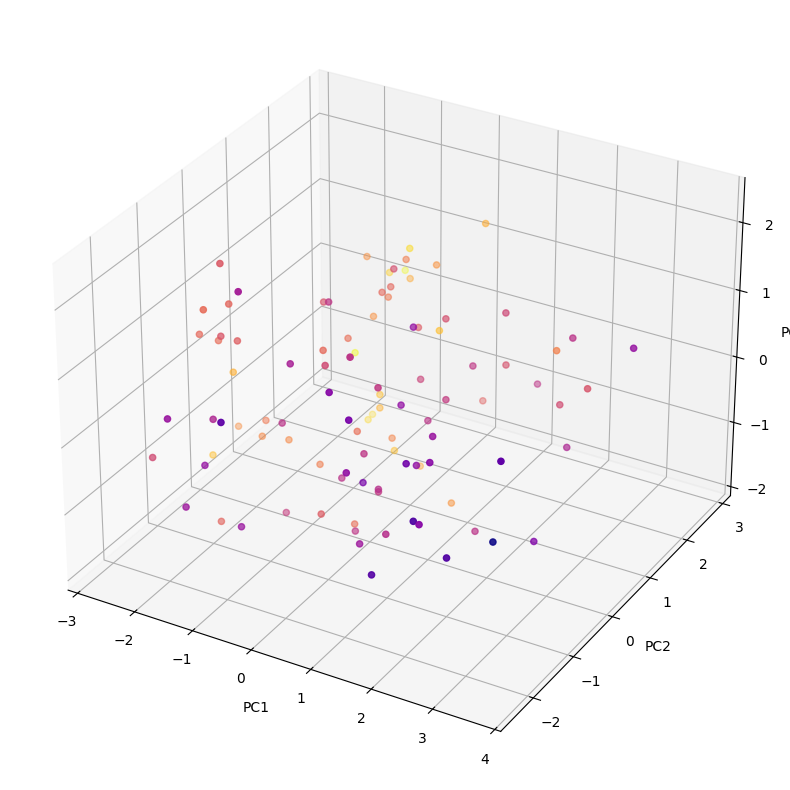

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=y,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

### SVD

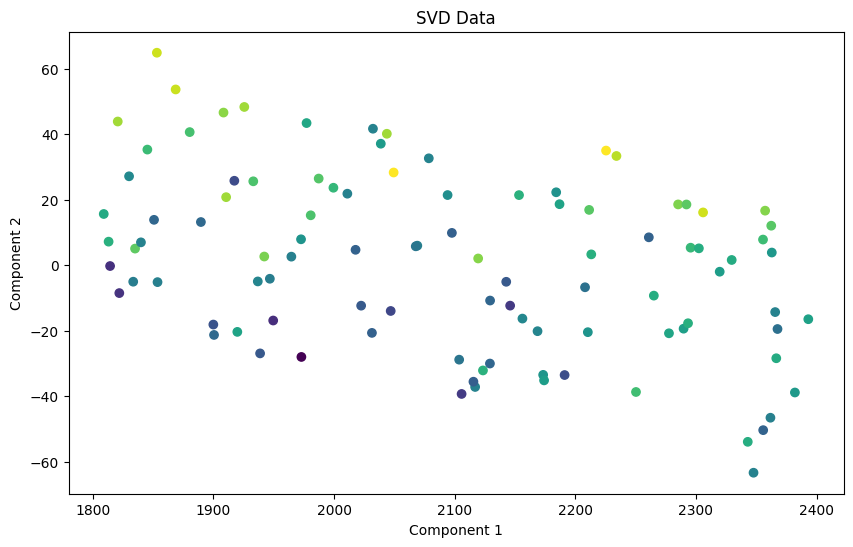

In [19]:
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt

# Perform SVD on the dataset
svd = TruncatedSVD(n_components=3)
svd.fit(df_without_date)

# Get the transformed data
svd_data = svd.transform(df_without_date)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the transformed data
plt.scatter(svd_data[:, 0], svd_data[:, 1], c=y, cmap='viridis')

# Set the title and labels
plt.title('SVD Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Show the plot
plt.show()

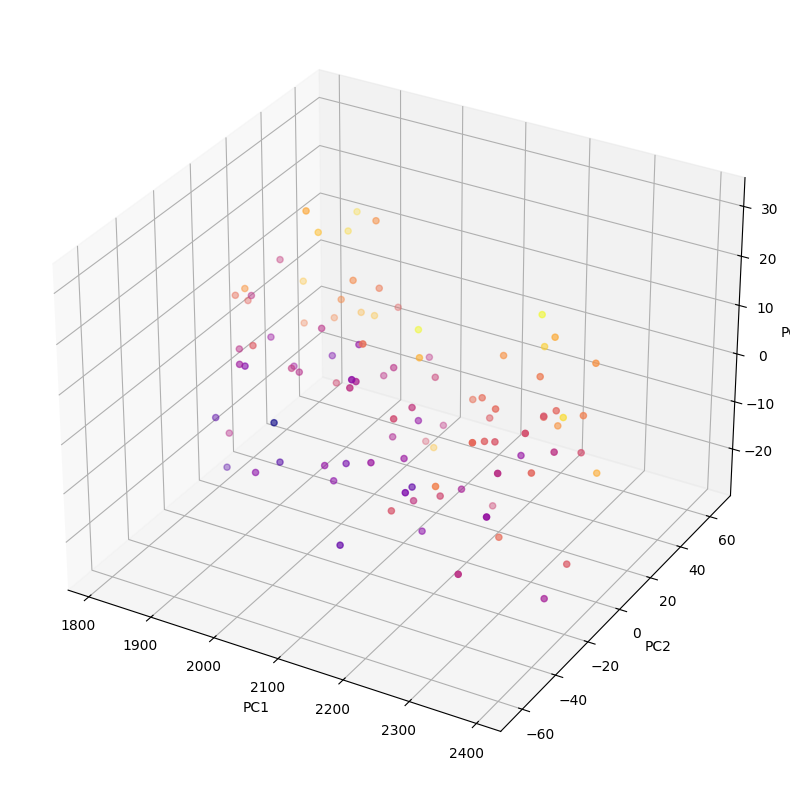

In [20]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure(figsize=(10, 10))

# Create a 3D axis
axis = fig.add_subplot(111, projection='3d')

# Plot the SVD data
axis.scatter(svd_data[:, 0], svd_data[:, 1], svd_data[:, 2], c=y, cmap='plasma')

# Set the labels for each axis
axis.set_xlabel('PC1')
axis.set_ylabel('PC2')
axis.set_zlabel('PC3')

# Show the plot
plt.show()

### tSNE

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3,perplexity=40, random_state=42)
X_train_tsne = tsne.fit_transform(df_without_date, y)

tsne.kl_divergence_

0.9318170547485352

In [22]:
X_train_tsne

array([[-1.00952347e+02,  5.14917984e+01, -4.26162033e+01],
       [-6.54656448e+01, -8.44479370e+01, -5.49119377e+01],
       [ 7.01481628e+01,  4.32406311e+01, -2.22196841e+00],
       [-1.41326284e+01, -7.79664383e+01,  4.65126228e+01],
       [-5.90813026e+01,  9.33447456e+00,  5.91037140e+01],
       [ 7.71767197e+01,  4.65970459e+01, -4.09433975e+01],
       [ 1.21788797e+01, -7.95364838e+01,  1.15915365e+01],
       [ 3.95448456e+01,  2.51567097e+01,  9.43605118e+01],
       [ 5.52581520e+01, -3.97026520e+01, -4.03655090e+01],
       [-2.43903446e+01, -4.59620667e+01,  7.41171494e+01],
       [ 8.62598267e+01,  3.09721870e+01,  3.35028915e+01],
       [-1.17976837e+02, -2.10906429e+01, -4.09908943e+01],
       [-4.26301956e+01, -2.15615120e+01,  4.58632164e+01],
       [-1.26422005e+02,  1.01871443e+01,  1.48427076e+01],
       [-3.45064049e+01,  3.35654297e+01, -8.99208755e+01],
       [ 6.88197422e+00, -7.64631348e+01, -3.42970428e+01],
       [-7.32823639e+01,  3.82416229e+01

In [23]:
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of FLEX dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()